In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
from pymongo import MongoClient
import matplotlib.pyplot as plt

C:\Users\91812\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
url = 'mongodb://localhost:27017';
client =  MongoClient("localhost", 27017, maxPoolSize=50)
db = client.Finance
collection = db['company']
dataCollection = db['data']
cursor = collection.find({})

In [3]:
rawData = pd.DataFrame()
stockReturn = pd.DataFrame()
stockReturnRate = {}
stockReturnMean = {}
stockReturnStd = {}
stockReturnVar = {}
stockReturnCov = {}
for document in cursor:
    rawData[document['symbol']] = wb.DataReader(document['symbol'], data_source='yahoo', start='2005-1-1')['Adj Close']
    stockReturnMean[document['symbol']] = rawData[document['symbol']] / rawData[document['symbol']].shift(1)
    stockReturn[document['symbol']] = (stockReturnMean[document['symbol']]) - 1
    stockReturnStd[document['symbol']] = stockReturn[document['symbol']].std() * 250 **.5
    stockReturnVar[document['symbol']] = stockReturn[document['symbol']].var()
    
    stockReturnRate[document['symbol']] = round(stockReturn[document['symbol']].mean()*250*100,6)
print("stockReturnRate")
print(stockReturnStd)
print(stockReturnVar)
stockReturnCov = stockReturn.cov()
print("stockReturnCov")
print(stockReturnCov)

stockReturnRate
{'KOTAKBANK.NS': 0.40673918348368426, 'TITAN.NS': 0.42760216890706193, 'TCS.NS': 0.42088267415706554, 'CIPLA.NS': 0.2940305210672456, 'NESTLEIND.NS': 1.0763259747291738, 'HEROMOTOCO.NS': 0.31541962388198763, 'LT.NS': 0.5665940133040829, 'GAIL.NS': 0.34973554638496757, 'TECHM.NS': 0.39878229606571036, 'WIPRO.NS': 0.7170878517213789, 'SHREECEM.NS': 0.34694892199269556, 'HINDALCO.NS': 0.459297654943879, 'BRITANNIA.NS': 0.29962373193968794, 'RELIANCE.NS': 0.44340283726576407, 'BHARTIARTL.NS': 0.3637435134871791, 'MARUTI.NS': 0.3345958708408522, 'BAJAJ-AUTO.NS': 0.25611082160354476, 'ULTRACEMCO.NS': 0.33307065774341926, 'ONGC.NS': 0.4207305844124917, 'COALINDIA.NS': 0.288523367531473, 'TATASTEEL.NS': 0.441210131513027, 'GRASIM.NS': 0.3340835854133449, 'ITC.NS': 0.9945307976914703, 'NTPC.NS': 0.32081095385983627, 'ZEEL.NS': 0.4384780433997538, 'ICICIBANK.NS': 0.41634463472660704, 'BAJAJFINSV.NS': 0.4016997111635054, 'INDUSINDBK.NS': 0.48710917731512515, 'BAJFINANCE.NS': 2.354

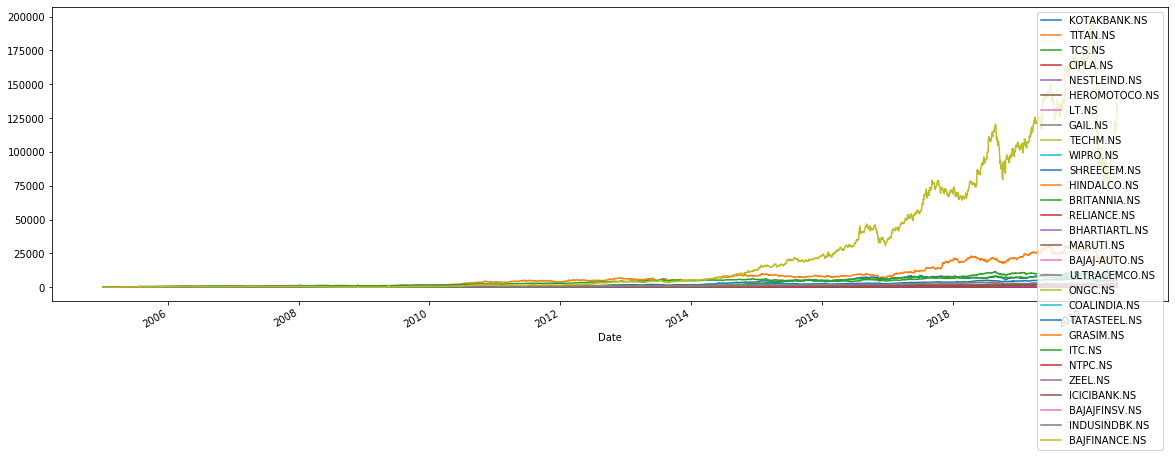

In [4]:
(rawData / rawData.iloc[0] * 100).plot(figsize=(20, 6));
plt.show()

In [5]:
print( )
print(stockReturnStd)

               KOTAKBANK.NS  TITAN.NS    TCS.NS  CIPLA.NS  NESTLEIND.NS  \
KOTAKBANK.NS       0.000662  0.000230  0.000159  0.000129      0.000036   
TITAN.NS           0.000230  0.000731  0.000149  0.000114      0.000050   
TCS.NS             0.000159  0.000149  0.000709  0.000083      0.000009   
CIPLA.NS           0.000129  0.000114  0.000083  0.000346      0.000026   
NESTLEIND.NS       0.000036  0.000050  0.000009  0.000026      0.004634   
HEROMOTOCO.NS      0.000136  0.000130  0.000102  0.000088      0.000039   
LT.NS              0.000292  0.000212  0.000310  0.000116      0.000053   
GAIL.NS            0.000185  0.000161  0.000111  0.000109      0.000044   
TECHM.NS           0.000186  0.000161  0.000212  0.000104      0.000074   
WIPRO.NS           0.000142  0.000139  0.000221  0.000101      0.000016   
SHREECEM.NS        0.000164  0.000137  0.000086  0.000085      0.000036   
HINDALCO.NS        0.000304  0.000266  0.000193  0.000166      0.000054   
BRITANNIA.NS       0.0001